<a href="https://colab.research.google.com/github/poornaditya1/Indian-Currency-Classifier/blob/master/Indian_Currency_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/content/drive/My Drive/Indian Currency Classifier/436904_829691_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Indian Currency Classifier')
zip_ref.close()

In [3]:
base_dir = '/content/drive/My Drive/Indian Currency Classifier/indian_currency_new'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_10_dir = os.path.join(train_dir, '10')
train_100_dir = os.path.join(train_dir, '100')
train_20_dir = os.path.join(train_dir, '20')
train_200_dir = os.path.join(train_dir, '200')
train_2000_dir = os.path.join(train_dir, '2000')
train_50_dir = os.path.join(train_dir, '50')
train_500_dir = os.path.join(train_dir, '500')

In [5]:
validation_10_dir = os.path.join(validation_dir, '10')
validation_100_dir = os.path.join(validation_dir, '100')
validation_20_dir = os.path.join(validation_dir, '20')
validation_200_dir = os.path.join(validation_dir, '200')
validation_2000_dir = os.path.join(validation_dir, '2000')
validation_50_dir = os.path.join(validation_dir, '50')
validation_500_dir = os.path.join(validation_dir, '500')

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 584 images belonging to 7 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 167 images belonging to 7 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=584,  # images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=167,  # images = batch_size * steps
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
584/584 [==============================] - 383s 656ms/step - loss: 1.9856 - accuracy: 0.1541 - val_loss: 1.9575 - val_accuracy: 0.1617
Epoch 2/10
584/584 [==============================] - 16s 28ms/step - loss: 1.9205 - accuracy: 0.1592 - val_loss: 1.8756 - val_accuracy: 0.2156
Epoch 3/10
584/584 [==============================] - 16s 28ms/step - loss: 1.8963 - accuracy: 0.1969 - val_loss: 1.8255 - val_accuracy: 0.2395
Epoch 4/10
584/584 [==============================] - 16s 28ms/step - loss: 1.8704 - accuracy: 0.2312 - val_loss: 1.7984 - val_accuracy: 0.2575
Epoch 5/10
584/584 [==============================] - 16s 28ms/step - loss: 1.7662 - accuracy: 0.2860 - val_loss: 1.7935 - val_accuracy: 0.2695
Epoch 6/10
584/584 [==============================] - 16s 28ms/step - loss: 1.7248 - accuracy: 0.3425 - val_loss: 1.7077 - val_accuracy: 0.4132
Epoch 7/10
584/584 [==============================] - 16s 

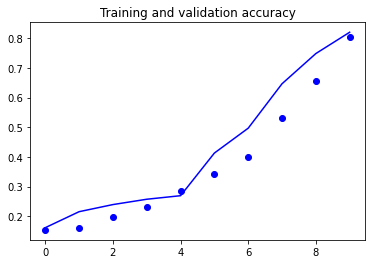

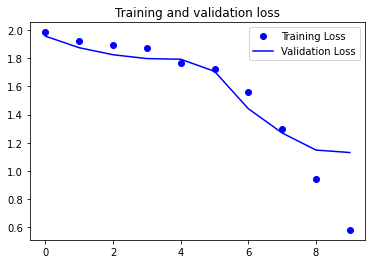

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("20")
  if classes[0][3] == 1:
    print("200")
  if classes[0][4] == 1:
    print("2000")
  if classes[0][5] == 1:
    print("50")
  if classes[0][6] == 1:
    print("500")

Saving 50 rupee.jpg to 50 rupee.jpg
Saving 20 rupee.jpg to 20 rupee.jpg
Saving 0.jpg to 0.jpg
Saving 2000.jpg to 2000.jpg
50 rupee.jpg
50
20 rupee.jpg
20
0.jpg
2000
2000.jpg
2000


2000
